Data Preparation

In [1]:
%cd /content/drive/MyDrive/RFM

/content/drive/MyDrive/RFM


In [2]:
# import libraries
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt


In [3]:
# data
data = pd.read_csv("online_shoppers.csv", encoding="ISO-8859-1").dropna()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [5]:
# Create a boolean isMinusQty that indicates which rows have a value less than 0 in the "Quantity" column
isMinusQty = data['Quantity'] < 0
# Use the isMinusQty to drop the rows from the DataFrame
data = data.drop(data[isMinusQty].index)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [7]:
# create Sales Column
data['sales'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [8]:
# Dates - Transform Date Variable
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate']


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397924, dtype: datetime64[ns]

In [9]:
# Get last date available
last_date_available = data['InvoiceDate'].max()+ timedelta(days=1)
last_date_available

Timestamp('2011-12-10 12:50:00')

In [10]:
# Aggregate on Customer Level
df = data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x:(last_date_available - x.max()).days,
    'InvoiceNo': 'nunique',
    'sales': 'sum'
})
df.head()

,InvoiceDate,InvoiceNo,sales
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [11]:
# Create Average Order Value(AOV) as Monetary variable
df['monetary'] = df.sales / df.InvoiceNo 
df.head()

,InvoiceDate,InvoiceNo,sales,monetary
CustomerID,,,,
12346.0,326,1,77183.60,77183.600000
12347.0,2,7,4310.00,615.714286
12348.0,75,4,1797.24,449.310000
12349.0,19,1,1757.55,1757.550000
12350.0,310,1,334.40,334.400000


In [12]:
# drop sales variable
df = df.drop(columns="sales")
df.head()

,InvoiceDate,InvoiceNo,monetary
CustomerID,,,
12346.0,326,1,77183.600000
12347.0,2,7,615.714286
12348.0,75,4,449.310000
12349.0,19,1,1757.550000
12350.0,310,1,334.400000


In [13]:
# change column name
df.rename(columns = {'InvoiceDate':'recency',
                     'InvoiceNo':'frequency'}, inplace = True)
df.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.600000
12347.0,2,7,615.714286
12348.0,75,4,449.310000
12349.0,19,1,1757.550000
12350.0,310,1,334.400000


In [25]:
df['frequency']

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: frequency, Length: 4339, dtype: int64

RFM Preparation

In [27]:
# Create RFM group
df['R'] = pd.qcut(x=df['recency'].rank(method='first'), q=5, labels = range(5,0,-1))
df['F'] = pd.qcut(x=df['frequency'].rank(method='first'), q=5, labels = range(1,6,1))
df['M'] = pd.qcut(x=df['monetary'].rank(method='first'), q=5, labels = range(1,6,1))
df.head()

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.600000,1,1,5
12347.0,2,7,615.714286,5,5,5
12348.0,75,4,449.310000,2,4,4
12349.0,19,1,1757.550000,4,1,5
12350.0,310,1,334.400000,1,1,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   recency    4339 non-null   int64   
 1   frequency  4339 non-null   int64   
 2   monetary   4339 non-null   float64 
 3   R          4339 non-null   category
 4   F          4339 non-null   category
 5   M          4339 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.7 KB


In [29]:
# RFM Score
df['R'] =  df['R'].astype(int)
df['F'] =  df['F'].astype(int)
df['M'] =  df['M'].astype(int)
df['RFM Score']  = df[['R','F','M']].sum(axis = 1)
df.head()

,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
12346.0,326,1,77183.600000,1,1,5,7
12347.0,2,7,615.714286,5,5,5,15
12348.0,75,4,449.310000,2,4,4,10
12349.0,19,1,1757.550000,4,1,5,10
12350.0,310,1,334.400000,1,1,3,5


In [30]:
# RFM Function
def rfm_segment(df):
  if ((df['R'] == 5) and (df['F'] >= 4)) :
    return 'CHAMPIONS'
  elif ((df['R'] >= 3) and (df['R'] <= 4) and (df['F'] >= 4)) :
    return 'LOYAL CUSTOMERS'
  elif ((df['R'] >= 4) and (df['F'] >= 2)and (df['F'] <= 3)) :
    return 'POTENTIAL LOYALIST'
  elif ((df['R'] == 5) and (df['F'] == 1)) :
    return 'NEW CUSTOMER' 
  elif ((df['R'] == 4) and (df['F'] == 1)) :
    return 'PROMISING'
  elif ((df['R'] == 3) and (df['F'] == 3)) :
    return 'NEED ATTENTION'
  elif ((df['R'] == 3) and (df['F'] >= 1) and (df['F'] <= 2)) :
    return 'ABOUT TO SLEEP'
  elif ((df['R'] >= 1) and (df['R'] <= 2) and (df['F'] == 5)) :
    return "CAN'T LOSE THEM"  
  elif ((df['R'] >= 1) and (df['R'] <= 2) and (df['F'] >= 3) and (df['F'] <= 4)) :
    return "AT RISK"  
  elif ((df['R'] <= 2) and (df['F'] <= 2)) :
    return 'HIBERNATING'
  else:
    return 'UNIDENTIFIED'

Applying RFM

In [31]:
#  apply RFM function
df['RFM_level'] = df.apply(rfm_segment, axis = 1)
df.head()

,recency,frequency,monetary,R,F,M,RFM Score,RFM_level
CustomerID,,,,,,,,
12346.0,326,1,77183.600000,1,1,5,7,HIBERNATING
12347.0,2,7,615.714286,5,5,5,15,CHAMPIONS
12348.0,75,4,449.310000,2,4,4,10,AT RISK
12349.0,19,1,1757.550000,4,1,5,10,PROMISING
12350.0,310,1,334.400000,1,1,3,5,HIBERNATING


In [32]:
# segment summary
df_sum = df.groupby('RFM_level').agg({
    'recency':'mean',
    'frequency': 'mean',
    'monetary': ['mean','count']
})

In [33]:
df_sum

recency  frequency    monetary      
                          mean       mean        mean count
RFM_level                                                  
ABOUT TO SLEEP       52.448571   1.162857  386.817900   350
AT RISK             152.832215   2.875839  370.344464   596
CAN'T LOSE THEM     130.569231   8.353846  345.356299    65
CHAMPIONS             5.876777  12.417062  430.051748   633
HIBERNATING         216.540465   1.101395  440.763108  1075
LOYAL CUSTOMERS      32.997552   6.478580  401.153940   817
NEED ATTENTION       51.191489   2.319149  376.548475   188
NEW CUSTOMER          6.857143   1.000000  388.212857    42
POTENTIAL LOYALIST   16.624738   2.014675  512.234427   477
PROMISING            22.947917   1.000000  359.067813    96

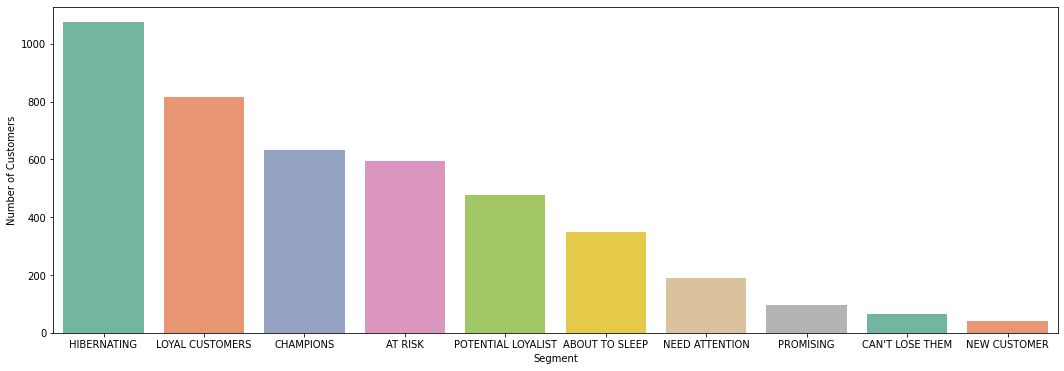

In [36]:
import seaborn as sns

# count the number of customers in each segment
segment_counts = df['RFM_level'].value_counts()

# create a bar chart of the segment counts
plt.figure(figsize=(18,6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="Set2")

# add labels and show the plot
plt.xlabel('Segment')
plt.ylabel('Number of Customers')

plt.show()
